# Individual Project 4: Exploratory Data Analysis
**Author:** Kerry Effinger  
**Version:** 1.0  
**Summary:**  

In [93]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

Loading dataset to notebook

In [2]:
data = pd.read_csv('GenderData2.csv')

### Exploring data, and cleaning it up.

In [30]:
data.dtypes

Time                                                                                       object
Year                                                                                       object
Country                                                                                    object
Country Code                                                                               object
Females in NatSci/Math/Stats programs(%)                                                   object
GDP Per Capita(current US$)                                                                object
Gov expenditure per student                                                                object
Female Life Expectancy                                                                     object
Male Life Expectancy                                                                       object
Population                                                                                 object
Female Population   

In [3]:
#renamed column names to more condensed names
data.columns = ['Time', 'Year', 'Country', 'Country Code', 'Females in NatSci/Math/Stats programs(%)', 'GDP Per Capita(current US$)',
               'Gov expenditure per student', 'Female Life Expectancy', 'Male Life Expectancy', 'Population','Female Population',
                'Female Pop(% of total)', 'Females in STEM programs(%)', 'Female Primary Graduation(%)', 'Male Primary Graduation(%)',
               'Female Tertiary Graduation(%)', 'Male Tertiary Graduation(%)', 'Youth Literacy',
                'A woman can get a job in the same way as a man (1=yes; 0=no)',
               'A woman can open a bank account in the same way as a man (1=yes; 0=no)',
               'A woman can choose where to live in the same way as a man (1=yes; 0=no)',
               'First Marriage female', 'First Marriage male', 
               'Sons and daughters have equal rights to inherit assets from their parents (1=yes; 0=no)',
               'Employed children, Male', 'Employed Children, Female', 'Total Labor Force', 'Female Labor Force',
               'Female Labor Force (% of total)', 'Female Retirement Age', 'Male Retirement Age']

The following cells were used to count how many rows in each column contained missing data, either 'na' or '..'

In [ ]:
#data['column name'].isna().sum()

In [4]:
data['Time'].isna().sum()

3

In [5]:
len(data[data['Male Retirement Age'] == '..'])


961

Somehow, two of the columns contained no data, so I went ahead and deleted them since they would not be useful. The year column was also a repeat of the time column so I deleted it. The first marriage columns were about 90% missing, so I deleted them as well. 

In [8]:
#data2.drop
data3 = data.drop(["Year", "Employed children, Male", "Employed Children, Female", "First Marriage female", "First Marriage male"], axis=1)

In [112]:
#data.describe()

Dropping the rows at the end of the dataframe since they do not contain any useful information.

In [35]:
data4 = data3.drop([data.index[1315], data.index[1316], data.index[1317], data.index[1318], data.index[1319]])

In [12]:
data4['Gov expenditure per student']

0             ..
1       21.77293
2       20.29085
3             ..
4             ..
          ...   
1310          ..
1311          ..
1312          ..
1313          ..
1314          ..
Name: Gov expenditure per student, Length: 1315, dtype: object

In [60]:
data4['Population'] = data4['Population'].replace(to_replace =[".."],
                            value = 0).astype(float)

In [61]:
data4['Population']

0       4.040244e+08
1       7.269385e+06
2       1.029943e+08
3       3.164387e+09
4       2.298486e+09
            ...     
1310    0.000000e+00
1311    0.000000e+00
1312    0.000000e+00
1313    0.000000e+00
1314    0.000000e+00
Name: Population, Length: 1315, dtype: float64

In [ ]:
,'GDP Per Capita(current US$)',
      #'Gov expenditure per student','Female Life Expectancy','Male Life Expectancy']

In [72]:
data4['Females in NatSci/Math/Stats programs(%)'] = data4['Females in NatSci/Math/Stats programs(%)'].replace(to_replace =[".."],value = 0).astype(float)

In [74]:
data4['GDP Per Capita(current US$)'] = data4['GDP Per Capita(current US$)'].replace(to_replace =[".."],
                            value = 0).astype(float)

In [82]:
data4[['Gov expenditure per student', 'Female Pop(% of total)', 'Females in STEM programs(%)', 
       'Female Primary Graduation(%)', 'Male Primary Graduation(%)',
        'Female Tertiary Graduation(%)', 'Male Tertiary Graduation(%)', 'Youth Literacy']]=data4[['Gov expenditure per student', 'Female Pop(% of total)',
                                                                                                  'Females in STEM programs(%)', 'Female Primary Graduation(%)', 'Male Primary Graduation(%)',
                                                                                                  'Female Tertiary Graduation(%)', 'Male Tertiary Graduation(%)',
                                                                                                  'Youth Literacy']].replace(to_replace =[".."],value = 0).astype(float)

In [89]:
data4[['Female Population','Total Labor Force',
       'Female Labor Force',
       'Female Labor Force (% of total)','Female Retirement Age',
       'Male Retirement Age']] = data4[['Female Population','Total Labor Force',
                                        'Female Labor Force','Female Labor Force (% of total)','Female Retirement Age','Male Retirement Age']].replace(to_replace =[".."],value = 0).astype(float)

In [77]:
data4[['Female Life Expectancy','Male Life Expectancy']] = data4[['Female Life Expectancy','Male Life Expectancy']].replace(to_replace =[".."],
                            value = 0).astype(float)

In [94]:
data4 = data4.replace(0, np.NaN)

In [95]:
data4.describe()

,Females in NatSci/Math/Stats programs(%),GDP Per Capita(current US$),Gov expenditure per student,Female Life Expectancy,Male Life Expectancy,Population,Female Population,Female Pop(% of total),Females in STEM programs(%),Female Primary Graduation(%),Male Primary Graduation(%),Female Tertiary Graduation(%),Male Tertiary Graduation(%),Youth Literacy,Total Labor Force,Female Labor Force,Female Labor Force (% of total),Female Retirement Age,Male Retirement Age
count,223.000000,981.000000,159.000000,736.000000,736.000000,1.048000e+03,9.560000e+02,956.000000,224.000000,302.000000,302.000000,233.000000,232.000000,293.000000,1.165000e+03,9.320000e+02,932.000000,354.000000,354.000000
mean,55.923183,16081.279274,16.242152,74.755278,69.938647,3.061834e+08,1.664384e+08,49.900085,34.821329,89.258155,88.479417,38.003553,25.665988,0.970135,1.534065e+08,5.965637e+07,40.933041,60.321610,61.637006
std,15.711556,23749.822875,6.521815,7.747380,7.196094,9.639405e+08,4.964256e+08,3.028768,9.194310,21.916314,21.521679,21.050899,14.782116,0.061729,4.576223e+08,1.764472e+08,9.083822,4.255926,3.741561
min,10.695740,261.247473,0.235070,53.614000,48.969000,1.122500e+04,4.600400e+04,24.166067,10.563380,26.879810,23.282280,1.152000,0.394240,0.550150,3.120400e+04,1.286000e+04,7.881056,50.000000,50.000000
25%,47.407070,2176.002245,12.095085,69.393750,65.236500,1.550598e+06,1.558362e+06,49.517501,28.839503,80.888423,78.152200,20.128990,12.316820,0.951070,1.748190e+06,5.908680e+05,38.839622,58.000000,60.000000
50%,56.159300,6448.829193,16.078140,76.463500,70.764000,1.027662e+07,5.864950e+06,50.156430,34.255215,95.292065,95.491420,38.377930,25.606380,0.999090,5.455406e+06,2.406610e+06,43.748915,60.000000,60.000000
75%,67.372945,18930.218628,20.290850,80.475750,75.100000,5.783608e+07,4.058040e+07,50.873484,40.983605,101.684812,100.619777,54.774200,36.139776,1.001830,3.463928e+07,1.478335e+07,46.682712,64.000000,65.000000
max,100.000000,185829.017960,37.323270,87.700000,82.300000,7.673534e+09,3.803440e+09,54.564823,66.666670,225.927670,230.220260,87.833672,68.078506,1.047180,3.468097e+09,1.348504e+09,56.005859,70.000000,70.000000


### Categorical Variables. 

The categorical questions are posed somewhat like survey questions for this dataset, with 1 representing yes and 0 representing no. 

In [172]:
data4['A woman can get a job in the same way as a man (1=yes; 0=no)'].groupby(data3['A woman can get a job in the same way as a man (1=yes; 0=no)']).count()

A woman can get a job in the same way as a man (1=yes; 0=no)
..    370
0     103
1     842
Name: A woman can get a job in the same way as a man (1=yes; 0=no), dtype: int64

In [173]:
data4['A woman can open a bank account in the same way as a man (1=yes; 0=no)'].groupby(data3['A woman can open a bank account in the same way as a man (1=yes; 0=no)']).count()

A woman can open a bank account in the same way as a man (1=yes; 0=no)
..    370
0      36
1     909
Name: A woman can open a bank account in the same way as a man (1=yes; 0=no), dtype: int64

In [175]:
data4['A woman can choose where to live in the same way as a man (1=yes; 0=no)'].groupby(data3['A woman can choose where to live in the same way as a man (1=yes; 0=no)']).count()

A woman can choose where to live in the same way as a man (1=yes; 0=no)
..    370
0     185
1     760
Name: A woman can choose where to live in the same way as a man (1=yes; 0=no), dtype: int64

In [176]:
data4['Sons and daughters have equal rights to inherit assets from their parents (1=yes; 0=no)'].groupby(data3['Sons and daughters have equal rights to inherit assets from their parents (1=yes; 0=no)']).count()

Sons and daughters have equal rights to inherit assets from their parents (1=yes; 0=no)
..    370
0     207
1     738
Name: Sons and daughters have equal rights to inherit assets from their parents (1=yes; 0=no), dtype: int64

### Correlation Table

In [97]:
datacorr = pd.DataFrame([data4['Sons and daughters have equal rights to inherit assets from their parents (1=yes; 0=no)'], 
                        data4['A woman can get a job in the same way as a man (1=yes; 0=no)'],
                        data4['A woman can open a bank account in the same way as a man (1=yes; 0=no)'],
                        data4['A woman can choose where to live in the same way as a man (1=yes; 0=no)']])

In [138]:
datacorr = datacorr.replace('..', np.NaN)

In [139]:
datacorr

,0,1,2,3,4,5,6,7,8,9,...,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314
Sons and daughters have equal rights to inherit assets from their parents (1=yes; 0=no),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,1,NaN,0,0,1,1
A woman can get a job in the same way as a man (1=yes; 0=no),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,1,NaN,0,0,1,1
A woman can open a bank account in the same way as a man (1=yes; 0=no),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,1,NaN,1,1,1,1
A woman can choose where to live in the same way as a man (1=yes; 0=no),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,0,1,1,NaN,0,0,1,1


/Users/kerryeffinger/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:204: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/kerryeffinger/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:209: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<AxesSubplot:>

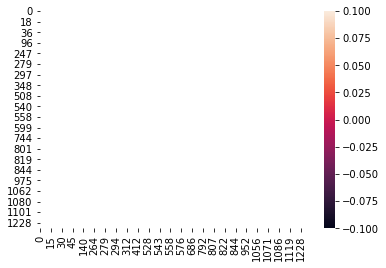

In [140]:
sns.heatmap(datacorr.corr())

### Visualizations

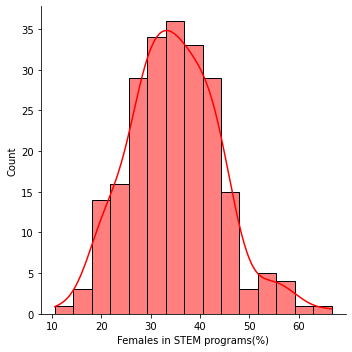

In [105]:
sns.displot(data4['Females in STEM programs(%)'], kde='True', color = 'red')
plt.savefig('STEM_dist.png')

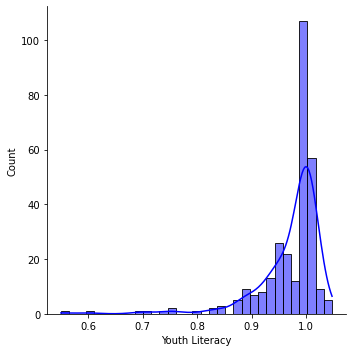

In [133]:
sns.displot(data4['Youth Literacy'], kde='True', color = 'blue')
plt.savefig('Literacy.png')

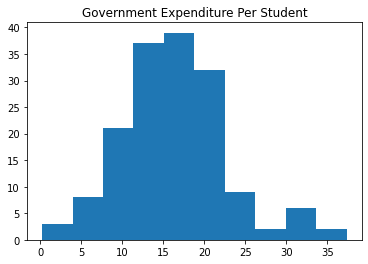

In [134]:
h1 = plt.hist(data4['Gov expenditure per student'], bins = 10)
plt.title('Government Expenditure Per Student')
plt.savefig('GovExpenditure')

In [141]:
#data4['Female Primary Graduation(%)'].sample(20)

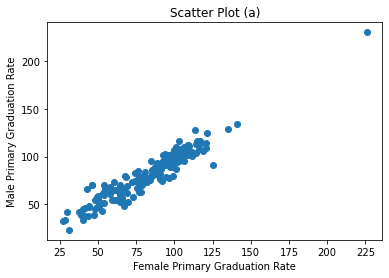

In [143]:
x = data4['Female Primary Graduation(%)']
y = data4['Male Primary Graduation(%)']

plt.scatter(x,y)
plt.xlabel('Female Primary Graduation Rate')
plt.ylabel('Male Primary Graduation Rate')
plt.title('Scatter Plot (a)')

plt.savefig('scatterA.png')

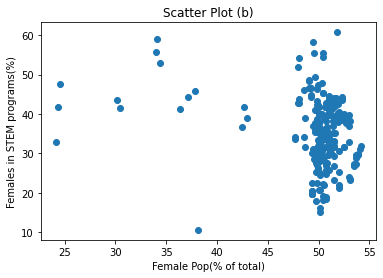

In [142]:
x = data4['Female Pop(% of total)']
y = data4['Females in STEM programs(%)']

plt.scatter(x,y)
plt.xlabel('Female Pop(% of total)')
plt.ylabel('Females in STEM programs(%)')
plt.title('Scatter Plot (b)')

plt.savefig('scatterB.png')

In [121]:
data4['Population'].mean()

306183377.9336832

In [125]:
data4.columns

Index(['Time', 'Country', 'Country Code',
       'Females in NatSci/Math/Stats programs(%)',
       'GDP Per Capita(current US$)', 'Gov expenditure per student',
       'Female Life Expectancy', 'Male Life Expectancy', 'Population',
       'Female Population', 'Female Pop(% of total)',
       'Females in STEM programs(%)', 'Female Primary Graduation(%)',
       'Male Primary Graduation(%)', 'Female Tertiary Graduation(%)',
       'Male Tertiary Graduation(%)', 'Youth Literacy',
       'A woman can get a job in the same way as a man (1=yes; 0=no)',
       'A woman can open a bank account in the same way as a man (1=yes; 0=no)',
       'A woman can choose where to live in the same way as a man (1=yes; 0=no)',
       'Sons and daughters have equal rights to inherit assets from their parents (1=yes; 0=no)',
       'Total Labor Force', 'Female Labor Force',
       'Female Labor Force (% of total)', 'Female Retirement Age',
       'Male Retirement Age'],
      dtype='object')

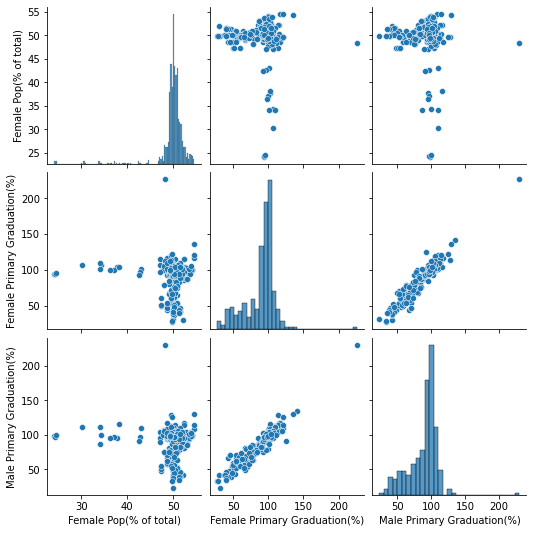

In [153]:
sns.pairplot(data4[['Female Pop(% of total)', 'Female Primary Graduation(%)', 'Male Primary Graduation(%)']])

plt.savefig('pairplot1.png')

Text(0.5, 1.0, 'A woman can get a job in the same way as a man')

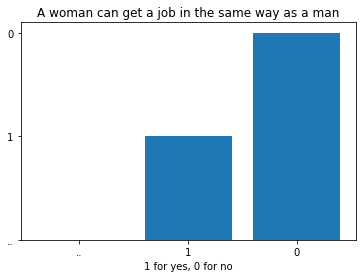

In [151]:
plt.bar(data4['A woman can get a job in the same way as a man (1=yes; 0=no)'],
        data4['A woman can get a job in the same way as a man (1=yes; 0=no)'])
plt.xlabel('1 for yes, 0 for no')
plt.title('A woman can get a job in the same way as a man')

#plt.savefig('')